### 1. Importing the required libraries and uploading the dataset

In [354]:
# to import the required libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm

# to upload the dataset

Dataset = pd.read_excel('C:/Users/gargi/Documents/JobAssignment-master/Rapido Data Analyst Assignment DataSet.xlsx')

### 2. Observing the dataset

1. To check the number of rows and columns in dataset

In [320]:
total_rows=len(Dataset.axes[0])
total_cols=len(Dataset.axes[1])
total_rows
total_cols

10

**Findings:** *There are total 10 columns and 44,587 rows in the dataset*

2. To check the missing values in each column


In [245]:
Dataset.isna().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

**Findings:** *There are no missing values in each column of the dataset*

3. To check total number of distinct customers in the dataset

In [246]:
Dataset['customer_id'].nunique()

19139

**Findings:** *There are total 19,139 unique customers who travelled*

4. To check total number of distinct trips in the dataset

In [247]:
Dataset['trip_id'].nunique()

44587

**Findings:** *There are total 44,587 unique trips and level of dataset is at trip_idl evel*

### 3. Cleaning the dataset

1. Convert timestamp into different date and time columns

In [321]:
def convert(x):
    return datetime.datetime.fromtimestamp(x/1e3)

Dataset['timestamp'] = Dataset['timestamp'].apply(lambda x: convert(x))
Dataset['date'] =Dataset['timestamp'].apply(lambda x :x.date())
Dataset['time'] =Dataset['timestamp'].apply(lambda x :x.time())

Dataset.head()


,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,date,time
0,ID001,CUST_001,2019-01-05 22:57:50.211,17.442705,17.442705,17.457829,17.457829,2.806,12.609667,37,2019-01-05,22:57:50.211000
1,ID002,CUST_002,2019-01-05 22:58:29.524,17.490189,17.490189,17.450548,17.450548,11.991,24.075200,119,2019-01-05,22:58:29.524000
2,ID003,CUST_003,2019-01-05 22:58:51.857,17.370108,17.370108,17.377041,17.377041,1.322,8.708300,27,2019-01-05,22:58:51.857000
3,ID004,CUST_004,2019-01-05 22:59:18.403,17.439314,17.439314,17.397131,17.397131,11.822,24.037550,121,2019-01-05,22:59:18.403000
4,ID005,CUST_005,2019-01-05 22:59:46.884,17.432325,17.432325,17.401625,17.401625,6.978,16.120867,58,2019-01-05,22:59:46.884000


2. To check total number of distinct dates

In [322]:
set(Dataset['date'])

{datetime.date(2019, 1, 2),
 datetime.date(2019, 1, 3),
 datetime.date(2019, 1, 4),
 datetime.date(2019, 1, 5),
 datetime.date(2019, 1, 6),
 datetime.date(2019, 1, 7)}

**Findings:** *There are total 6 distinct dates from 2nd Jan, 2019 to 7th Jan, 2019*

3. To check the descriptive analysis for each column

In [323]:
Dataset.describe()

,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,17.427598,17.427598,17.427520,17.427520,5.094359,15.819835,53.872833
std,0.030151,0.030151,0.037690,0.037690,3.365008,23.462865,33.430462
min,17.330339,17.330339,12.921696,12.921696,-1.000000,0.022750,20.000000
25%,17.404811,17.404811,17.405149,17.405149,2.744500,8.428525,36.000000
50%,17.431681,17.431681,17.430460,17.430460,4.299000,13.126250,46.000000
75%,17.446578,17.446578,17.446780,17.446780,6.679500,20.111167,60.000000
max,17.528885,17.528885,17.736155,17.736155,52.801000,4134.388700,1670.000000


**Findings:** *1. The latitude and longitude coordinates are same for both pick up and drop location*

**Findings:** *2. The minimum distance travelled is -1 which is not possible*

4. To check the outliers in travel distance and time travelled

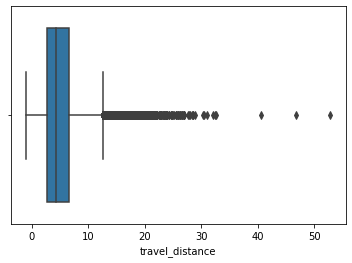

In [324]:
sns.boxplot(x=Dataset['travel_distance'])

**Findings:** *We will remove the distance travelled =-1 and more than 20 from our dataset*

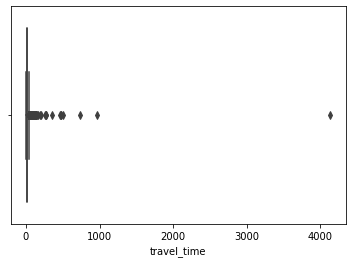

In [325]:
sns.boxplot(x=Dataset['travel_time'])

**Findings** *The 75% of trips happened in 20 mins, lets consider the travel time upto 120 mins in our analysis*

5. To create the Final Dataset by removing the outliers

In [326]:
Final_DS=Dataset[(Dataset['travel_distance']>0) & (Dataset['travel_distance']<20) & (Dataset['travel_time']<120)  ]
Final_DS.describe()

,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,44191.000000,44191.000000,44191.000000,44191.000000,44191.000000,44191.000000,44191.000000
mean,17.427612,17.427612,17.427629,17.427629,5.060699,15.523689,53.260211
std,0.030098,0.030098,0.030924,0.030924,3.177471,9.975884,29.172818
min,17.333647,17.333647,17.322180,17.322180,0.001000,0.022750,20.000000
25%,17.404873,17.404873,17.405239,17.405239,2.763000,8.473450,36.000000
50%,17.431686,17.431686,17.430464,17.430464,4.308000,13.139850,46.000000
75%,17.446550,17.446550,17.446751,17.446751,6.664000,20.052350,60.000000
max,17.528885,17.528885,17.560116,17.560116,19.980000,113.927683,959.000000


### 4. Performing Exploratory data analysis

1. To get the correlation between trip fare and travel distance, travel time


,travel_distance,travel_time,trip_fare
travel_distance,1.000000,0.827749,0.935656
travel_time,0.827749,1.000000,0.787299
trip_fare,0.935656,0.787299,1.000000


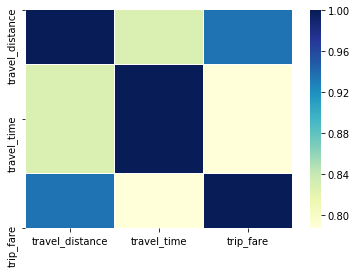

In [327]:
corrmat = Final_DS[['travel_distance','travel_time','trip_fare']].corr() 
  
f, ax = plt.subplots() 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
corrmat

**Findings:** *Trip fare is highly correlated with travel distance rather than travel time*

2. To divide the day into different time slots and to see how the number of rides depends on it

(2.a) To create the list of different time slots

In [328]:
lst =[datetime.time(0, 0, 0),datetime.time(5, 0, 0),datetime.time(7, 30, 0),
      datetime.time(10, 30, 0),datetime.time(12, 0, 0),datetime.time(15, 0, 0),
      datetime.time(17, 0, 0),datetime.time(20, 0, 0),datetime.time(21, 30, 0)]

(2.b) Define a function which will pass the time and assign it a particular time slot

In [329]:
def TimeBin(x):
    if (x>datetime.time(0, 0, 0))&(x<=datetime.time(5, 0, 0)):
        return '01.Night (12 AM - 05 AM)'
    elif (x>datetime.time(5, 0, 0))&(x<=datetime.time(7, 30, 0)):
        return '02.Early Morning (05 AM - 07:30AM)'
    elif (x>datetime.time(7,30, 0))&(x<=datetime.time(10, 30, 0)):
        return '03.Office Start (07:30 AM - 10:30 AM)'
    elif (x>datetime.time(10,30, 0))&(x<=datetime.time(12, 30, 0)):
        return '04.Working Hours - Morning (10:30 AM - 12:30 PM)'
    elif (x>datetime.time(12,30, 0))&(x<=datetime.time(15, 00, 0)):
        return '05.Lunch(12:30 PM - 03:00 PM)'
    elif (x>datetime.time(15,00, 0))&(x<=datetime.time(17, 30, 0)):
        return '06.Working Hours - Evening(03:00 PM - 05:30 PM)'
    elif (x>datetime.time(17,30, 0))&(x<=datetime.time(20, 30, 0)):
        return '07.Office Return(05:30 PM - 08:30 PM)'
    elif (x>datetime.time(20,30, 0))&(x<=datetime.time(22, 00, 0)):
        return '08.Late Returns(08:30 PM - 10:00 PM)' 
    else:
        return '09.Late Night(10:00 PM - !2:00 AM)'


(2.c) Define a function which will assign the date to weekend and weekday

In [330]:
def DayBin(x):
    if x in ['2019-01-02','2019-01-03','2019-01-06','2019-01-07']:
        return 'Weekday'
    else:
        return 'Weekend'

(2.d) Pass the dataset into above 2 defined functions and create 2 columns based on it

In [331]:
Final_DS['timebin'] = Final_DS['time'].apply(lambda x: TimeBin(x))
Final_DS['day'] = (Final_DS['date'].astype(str)).apply(lambda x: DayBin(x))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [332]:
Final_DS.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare,date,time,timebin,day
0,ID001,CUST_001,2019-01-05 22:57:50.211,17.442705,17.442705,17.457829,17.457829,2.806,12.609667,37,2019-01-05,22:57:50.211000,09.Late Night(10:00 PM - !2:00 AM),Weekend
1,ID002,CUST_002,2019-01-05 22:58:29.524,17.490189,17.490189,17.450548,17.450548,11.991,24.075200,119,2019-01-05,22:58:29.524000,09.Late Night(10:00 PM - !2:00 AM),Weekend
2,ID003,CUST_003,2019-01-05 22:58:51.857,17.370108,17.370108,17.377041,17.377041,1.322,8.708300,27,2019-01-05,22:58:51.857000,09.Late Night(10:00 PM - !2:00 AM),Weekend
3,ID004,CUST_004,2019-01-05 22:59:18.403,17.439314,17.439314,17.397131,17.397131,11.822,24.037550,121,2019-01-05,22:59:18.403000,09.Late Night(10:00 PM - !2:00 AM),Weekend
4,ID005,CUST_005,2019-01-05 22:59:46.884,17.432325,17.432325,17.401625,17.401625,6.978,16.120867,58,2019-01-05,22:59:46.884000,09.Late Night(10:00 PM - !2:00 AM),Weekend


(2.e) To create pivot table to understand the number of trips for each day and time slot

In [333]:
pivot_timeslot_data = pd.pivot_table(Final_DS[['trip_id','date','timebin']],values = 'trip_id',
                                                columns = 'date',
                                                index = 'timebin',
                                                aggfunc = 'count').reset_index()

pivot_timeslot_data.columns = ['timebin','Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
pivot_timeslot_data

,timebin,Thursday,Friday,Saturday,Sunday,Monday,Tuesday
0,01.Night (12 AM - 05 AM),48,69,87,146,157,116
1,02.Early Morning (05 AM - 07:30AM),75,101,89,97,61,145
2,03.Office Start (07:30 AM - 10:30 AM),1605,1695,1734,1177,574,1901
3,04.Working Hours - Morning (10:30 AM - 12:30 PM),998,1044,943,765,518,1168
4,05.Lunch(12:30 PM - 03:00 PM),979,932,1063,986,698,1118
5,06.Working Hours - Evening(03:00 PM - 05:30 PM),964,1006,1088,1029,724,1050
6,07.Office Return(05:30 PM - 08:30 PM),1936,1976,2052,1565,1057,2085
7,08.Late Returns(08:30 PM - 10:00 PM),661,687,789,591,430,774
8,09.Late Night(10:00 PM - !2:00 AM),407,440,543,421,337,490


(2.f) To get the average across each day for different time slot

In [334]:
pivot_timeslot_data['Avg rides']=pivot_timeslot_data.mean(axis=1)

(2.g) To get the graph how trips are differing across each time slot

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

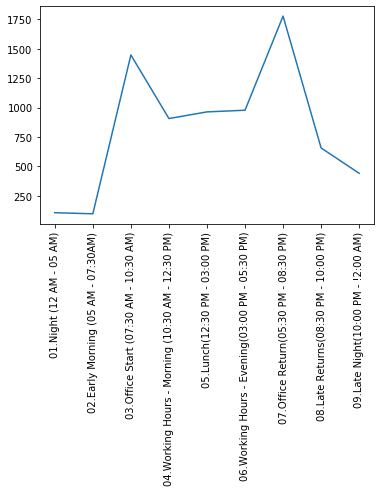

In [335]:
plt.plot(pivot_timeslot_data['timebin'],pivot_timeslot_data['Avg rides'])
plt.xticks(rotation=90)

**Findings:** *Number of rides is maximum at Office return (5:30 to 8:30) and Office start(7:30 to 10:30)*

3. To see the performance of trips at customer level

(3.a) To create the pivot table at customer level, number of trips made each day

In [336]:
Cust_no_of_trips = pd.pivot_table(Final_DS[['customer_id','trip_id','date']],values = 'trip_id',
                                                columns = 'date',
                                                index = 'customer_id',
                                                aggfunc = 'count')

Cust_no_of_trips.columns = ['Thursday','Friday','Saturday','Sunday','Monday','Tuesday']
Cust_no_of_trips = Cust_no_of_trips.fillna(0)

(3.b) To get the total number of trips made 

In [337]:
Cust_no_of_trips['Total Trips'] = Cust_no_of_trips.sum(axis = 1, skipna = True) .astype(int)
Cust_no_of_trips = trips_cust.fillna(0)


(3.c) To see the distribution of total trips and number of customers

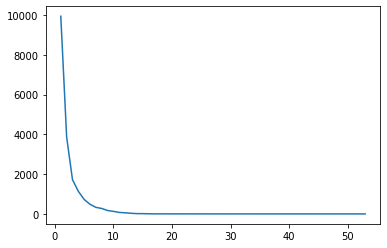

In [271]:
plt.plot(Cust_no_of_trips.groupby(['Total Trips'])['customer_id'].count())

**Findings:** *Maximum number of customers has made total number of trips up to 5*

(3.d) To see the distributon of total trips

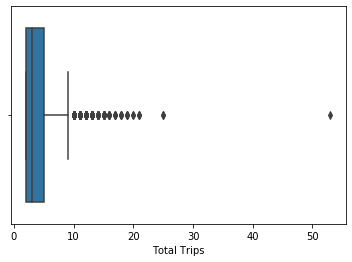

In [272]:
ax=sns.boxplot(x=Cust_no_of_trips.loc[Cust_no_of_trips['Total Trips']>1,'Total Trips'])

4. To see the difference between into single time and multiple time users

(4.a) To divide the customers into single time usre and multiple time user

In [273]:
cids1 = Cust_no_of_trips.loc[Cust_no_of_trips['Total Trips']==1,'customer_id'].tolist()
onetrip_ds = Final_DS[Final_DS['customer_id'].isin(cids1)]
multiple_ds = Final_DS[~Final_DS['customer_id'].isin(cids1)]

(4.b) To see at what time most of the one time user are making a trip

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

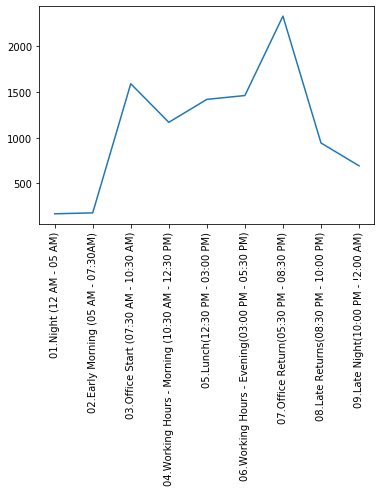

In [275]:
plt.plot(onetrip_ds.groupby('timebin')['trip_id'].size())
plt.xticks(rotation=90)

**Findings:** *Most of the users are travelling at office returns(5:30pm to 8:30)*

(4.c) To see at how the price differs with the different timestamps for single user

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

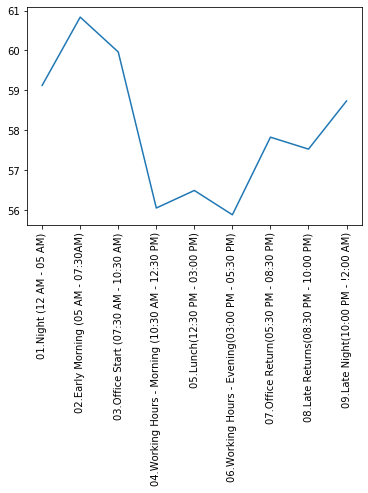

In [276]:
plt.plot(onetrip_ds.groupby('timebin')['trip_fare'].mean())
plt.xticks(rotation=90)

**Findings:** *The trip fare is high during 12am to 10:30am*

(4.d) To see at what time most of the one time user are making a trip

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

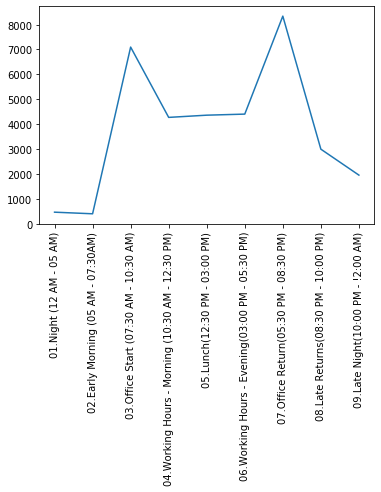

In [277]:
plt.plot(multiple_ds.groupby('timebin')['trip_id'].size())
plt.xticks(rotation=90)

**Findings:** *Most of the users are travelling at office returns(5:30pm to 8:30)*

(4.e) To see at how the price differs with the different timestamps for multiple user

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

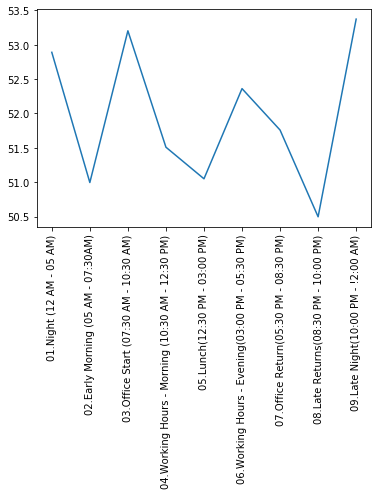

In [278]:
plt.plot(multiple_ds.groupby('timebin')['trip_fare'].mean())
plt.xticks(rotation=90)

**Findings:** *There is high trip rate in 10pm to 5am, 7:30am to 10am and 3pm to 5:30pm for multiple user*

In [279]:
onetrip_ds.describe()

,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000,9937.000000
mean,17.423081,17.423081,17.423842,17.423842,5.524649,16.825652,57.596860
std,0.033049,0.033049,0.034475,0.034475,3.523311,10.994869,32.429167
min,17.334480,17.334480,17.324289,17.324289,0.001000,0.052483,20.000000
25%,17.398596,17.398596,17.398146,17.398146,2.891000,9.060267,37.000000
50%,17.424175,17.424175,17.425028,17.425028,4.708000,14.292633,49.000000
75%,17.443916,17.443916,17.445286,17.445286,7.374000,21.867317,65.000000
max,17.524307,17.524307,17.540697,17.540697,19.980000,113.927683,229.000000


In [280]:
multiple_ds.describe()

,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,34254.000000,34254.000000,34254.000000,34254.000000,34254.000000,34254.000000,34254.000000
mean,17.428927,17.428927,17.428727,17.428727,4.926108,15.145993,52.002160
std,0.029055,0.029055,0.029725,0.029725,3.056769,9.627468,28.033032
min,17.333647,17.333647,17.322180,17.322180,0.001000,0.022750,20.000000
25%,17.407238,17.407238,17.407518,17.407518,2.729000,8.355421,36.000000
50%,17.433000,17.433000,17.432096,17.432096,4.220000,12.834158,45.000000
75%,17.446981,17.446981,17.446896,17.446896,6.447000,19.518262,59.000000
max,17.528885,17.528885,17.560116,17.560116,19.886000,110.638750,959.000000


5. To see how the time of the day affects the trip price

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

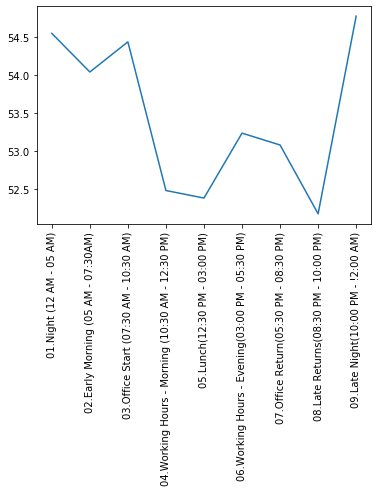

In [281]:
plt.plot(Final_DS.groupby('timebin')['trip_fare'].mean())
plt.xticks(rotation=90)

**Findings:** *The trip rate is high in Night(12am to 5am), office start(7:30am to 10:30am) and late ight(10pm to 12pm)*

6. To see how the trip fare changes as per the weekday and weekend

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

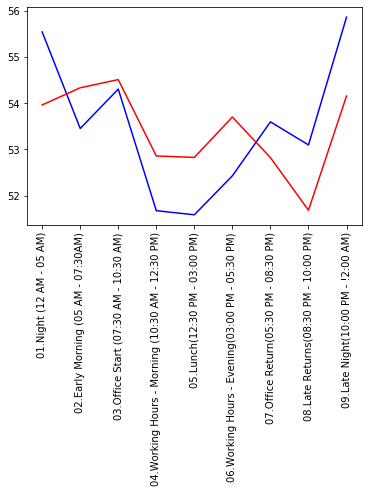

In [294]:
plt.plot(Final_DS[Final_DS['day']=='Weekend'].groupby('timebin')['trip_fare'].mean(), color='blue')
plt.plot(Final_DS[Final_DS['day']=='Weekday'].groupby('timebin')['trip_fare'].mean(), color='red')
plt.xticks(rotation=90)

**Findings:** *Weekend price is higher than weekday from 5:30 pm to 5am*

7. To see how the number of trips is affecting by the weekday and weekend

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

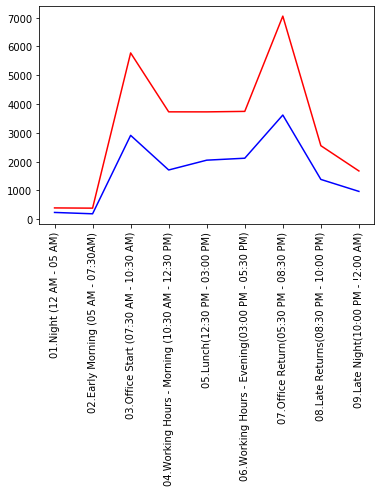

In [296]:
plt.plot(Final_DS[Final_DS['day']=='Weekend'].groupby('timebin')['trip_id'].count(), color='blue')
plt.plot(Final_DS[Final_DS['day']=='Weekday'].groupby('timebin')['trip_id'].count(), color='red')
plt.xticks(rotation=90)

**Findings:** *Number of trips is higher on weekdays rather than weekend*

### 5. Metric calculation

1. To filter the first and the second trip of each customer (considering customers with multiple trips)

In [314]:
multiple_ds.sort_values(by = ['customer_id','timestamp'], ascending = True,inplace = True)
multiple_ds['trip no']=1
multiple_ds['trip no'] = multiple_ds[['customer_id','trip no']].groupby(['customer_id'])['trip no'].apply(lambda x: x.cumsum())
trip12 = multiple_ds[(multiple_ds['trip no']==1) | (multiple_ds['trip no']==2)]

2. To create the pivot table containing the time diffrence between first and second trip for each customer

In [315]:
cust12 = pd.pivot_table(trip12,values = 'timestamp',
                       index = 'customer_id',
                       columns = 'trip no',
                       aggfunc = min)

cust12 = cust12.reset_index()
cust12.columns = ['customer_id','trip no 1','trip no 2']
cust12['TimeDifference'] = (cust12['trip no 2']-cust12['trip no 1']).dt.total_seconds()/(24*60*60)
cust12

,customer_id,trip no 1,trip no 2,TimeDifference
0,CUST_001,2019-01-05 13:54:50.138,2019-01-05 21:12:58.281,0.304261
1,CUST_003,2019-01-03 08:54:16.172,2019-01-04 10:45:29.008,1.077232
2,CUST_004,2019-01-02 00:56:48.503,2019-01-02 11:13:55.891,0.428558
3,CUST_005,2019-01-05 22:59:46.884,2019-01-06 13:17:26.409,0.595596
4,CUST_006,2019-01-02 13:01:05.381,2019-01-02 21:12:13.150,0.341062
...,...,...,...,...
9052,CUST_9992,2019-01-02 08:20:39.473,2019-01-05 08:17:06.464,2.997535
9053,CUST_9993,2019-01-02 08:20:44.776,2019-01-02 15:43:57.178,0.307782
9054,CUST_9994,2019-01-02 08:21:27.091,2019-01-02 19:12:11.907,0.451908
9055,CUST_9997,2019-01-02 08:22:06.693,2019-01-02 12:46:29.037,0.183592


3. To see the mean of time difference

1.034998617605473


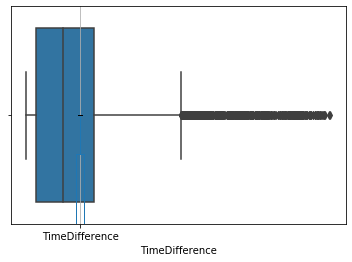

In [316]:
print(cust12['TimeDifference'].mean())
cust12.boxplot(column=['TimeDifference'])
ax = sns.boxplot(x=cust12['TimeDifference'])

**Findings:** *The average duration between the 1st trip and the 2nd trip of customers considering only
the customers who have done 2 or more trips is ~1 day*

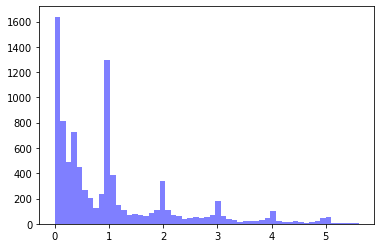

In [317]:
n, bins, patches = plt.hist(cust12.TimeDifference, bins='auto', facecolor='blue', alpha=0.5)

4. To assign customer as potential user,non frequnt user and weekday commute user base on their trips

In [347]:
def CustSegmnt(x):
    x = list(x)[2:8]
    if (x[0]>0) & (x[1]>0) & (x[5]>0) & (x[2]==0) & (x[3]==0):
        return 'Weekday Commute User'
    elif sum([i>0 for i in x if (i>0)])>4:
        return 'Potential User'
    else:
        return 'Not Frequent User'
    
Cust_no_of_trips['User Segment'] = Cust_no_of_trips.apply(lambda x:CustSegmnt(x),axis = 1)
Cust_no_of_trips = Cust_no_of_trips.reset_index()

Final_DS = pd.merge(Final_DS,Cust_no_of_trips[['customer_id','User Segment']],how = 'left',on = 'customer_id')


TypeError: ("'>' not supported between instances of 'str' and 'int'", 'occurred at index 0')

In [351]:
Final_DS.groupby('User Segment')['customer_id'].nunique()

User Segment
Not Frequent User       17973
Potential User            850
Weekday Commute User      171
Name: customer_id, dtype: int64

**Findings:** *171 users are using the ride every weekday, 850 users are the potential users and 17,973 are not frequent users*

### 6. Model building

In [353]:

data = Final_DS[['travel_distance', 'travel_time', 'trip_fare']]
X = data[['travel_distance', 'travel_time']]
y = data["trip_fare"]

# Note the difference in argument order
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = model.predict(X) # make the predictions by the model
pd.DataFrame({'travel_distance':[3.5],
              'travel_time':[15]})
# Print out the statistics
model.predict(pd.DataFrame({'travel_distance':[3.5],'travel_time':[15]}))
model.coef_
model.intercept_


9.504558927223712

In [357]:

X = data[['travel_distance', 'travel_time']]
y = data["trip_fare"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.predict(pd.DataFrame({'const':1,'travel_distance':[3.5],'travel_time':[15]}))


0    40.27349
dtype: float64

In [356]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              trip_fare   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                 1.560e+05
Date:                Sun, 19 Jan 2020   Prob (F-statistic):               0.00
Time:                        22:56:27   Log-Likelihood:            -1.6565e+05
No. Observations:               44191   AIC:                         3.313e+05
Df Residuals:                   44188   BIC:                         3.313e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.5046      0.094    100.879      0.000       9.320       9.689
travel_distance     8.2812      0.027    302.086      0.000       8.227       8.335
travel_time         0.1190      0.009     13.628      0.000       0.102       0.136
==============================================================================
Omnibus:                   139769.308   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37522038673.545
Skew:                          50.496   Prob(JB):                         0.00
Kurtosis:                    4516.082   Cond. No.                         37.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""